## Amir Shokri
## St code : 9811920009
## E-mail : amirsh.nll@gmail.com

## K-Nearest Neighbour (KNN) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/Users/Amirsh.nll/Downloads/glass'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/Amirsh.nll/Downloads/glass\Decision-Tree.ipynb
/Users/Amirsh.nll/Downloads/glass\glass.csv
/Users/Amirsh.nll/Downloads/glass\KNN.ipynb
/Users/Amirsh.nll/Downloads/glass\logistic_regression.ipynb
/Users/Amirsh.nll/Downloads/glass\mlp.ipynb
/Users/Amirsh.nll/Downloads/glass\Naive-Bayes.ipynb
/Users/Amirsh.nll/Downloads/glass\.ipynb_checkpoints\Decision-Tree-checkpoint.ipynb
/Users/Amirsh.nll/Downloads/glass\.ipynb_checkpoints\KNN-checkpoint.ipynb
/Users/Amirsh.nll/Downloads/glass\.ipynb_checkpoints\logistic_regression-checkpoint.ipynb
/Users/Amirsh.nll/Downloads/glass\.ipynb_checkpoints\mlp-checkpoint.ipynb
/Users/Amirsh.nll/Downloads/glass\.ipynb_checkpoints\Naive-Bayes-checkpoint.ipynb


In [2]:
data = pd.read_csv('glass.csv', encoding ='latin1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [3]:
data.head(20000)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
y = data['Type'].values
y = y.reshape(-1,1)
x_data = data.drop(['Type'],axis = 1)
print(x_data)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]


In [5]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x.head(20000)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.5,random_state=100)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (107, 9)
x_test:  (107, 9)
y_train:  (107, 1)
y_test:  (107, 1)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
K = 1
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(x_train, y_train.ravel())
print("When K = {} neighnors , KNN test accuracy: {}".format(K, knn.score(x_test, y_test)))
print("When K = {} neighnors , KNN train accuracy: {}".format(K, knn.score(x_train, y_train)))

When K = 1 neighnors , KNN test accuracy: 0.6448598130841121
When K = 1 neighnors , KNN train accuracy: 1.0


In [8]:
ran = np.arange(1,30)
train_list = []
test_list = []
for i,each in enumerate(ran):
    knn = KNeighborsClassifier(n_neighbors=each)
    knn.fit(x_train, y_train.ravel())
    test_list.append(knn.score(x_test, y_test))
    train_list.append(knn.score(x_train, y_train))

Best test score is 0.6448598130841121 and K = 1
Best train score is 1.0 and K = 1


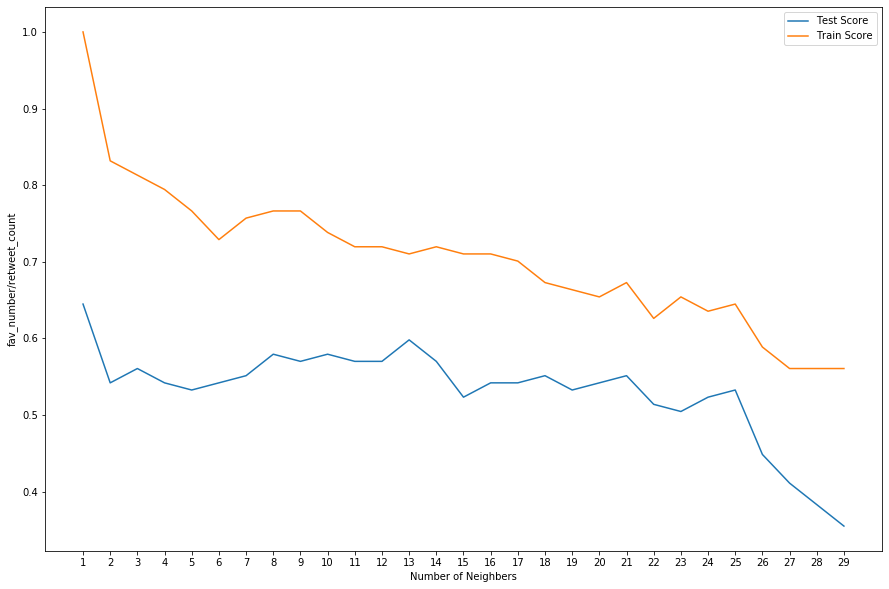

In [9]:
plt.figure(figsize=[15,10])
plt.plot(ran,test_list,label='Test Score')
plt.plot(ran,train_list,label = 'Train Score')
plt.xlabel('Number of Neighbers')
plt.ylabel('fav_number/retweet_count')
plt.xticks(ran)
plt.legend()
print("Best test score is {} and K = {}".format(np.max(test_list), test_list.index(np.max(test_list))+1))
print("Best train score is {} and K = {}".format(np.max(train_list), train_list.index(np.max(train_list))+1))